# Chapter 5

## Intro
+ Multiple regression - using more than 1 predictor variable to model an outcome
+ Why use?:
    + Statistical control for confounds - A confound makes a variable of no real importance seem important.
        + Storks -> babies actually more chimneys - more houses - more stork nests more babies
        + Cities in USA - number of dogs -> number of road traffic accidents
    + Multiple causation Net wealth could be earned , inherited
    + Interaction - where two variables react with each other
![alt text](images/5/Interaction_plot_stroke_survival.svg.png "Title")

+ lecture 5 Link
    + https://www.youtube.com/watch?v=UpP-_mBvECI


## Waffle Dataset

In [1]:
library(rethinking)
library(dagitty)
data(WaffleDivorce)
d <- WaffleDivorce

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.5, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.2

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/david/.cmdstan/cmdstan-2.30.0

- CmdStan version: 2.30.0


A newer version of CmdStan is available. See ?install_cmdstan() to install it.
To disable this check set option or environment variable CMDSTANR_NO_VER_CHECK=TRUE.

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
head(d)

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
2,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
3,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
4,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
5,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00
6,Colorado,CO,5.03,25.7,23.5,1.24,11.6,0.94,11,0,0,34277,0.00


In [3]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Location,NaN,NA,NA,NA,
Loc,NaN,NA,NA,NA,
Population,6.119600e+00,6.876156e+00,0.65780,1.897690e+01,▇▃▁▁▁▁▁▁
MedianAgeMarriage,2.605400e+01,1.243630e+00,24.26950,2.826100e+01,▁▁▂▂▃▇▅▃▁▁▂▁▁▁
Marriage,2.011400e+01,3.797905e+00,15.20850,2.649150e+01,▁▃▇▇▇▅▂▁▁▁
Marriage.SE,1.399400e+00,7.969749e-01,0.54950,2.902200e+00,▁▇▅▃▁▂▁▁
Divorce,9.688000e+00,1.820814e+00,6.66950,1.273050e+01,▂▃▅▅▇▂▃▁
Divorce.SE,9.618000e-01,5.253675e-01,0.34085,1.893050e+00,▂▇▇▃▃▂▁▂▂▁▁▁
WaffleHouses,3.234000e+01,6.578959e+01,0.00000,1.357450e+02,▇▁▁▁▁▁▁▁


In [4]:
dim(d)

[1] 50 13

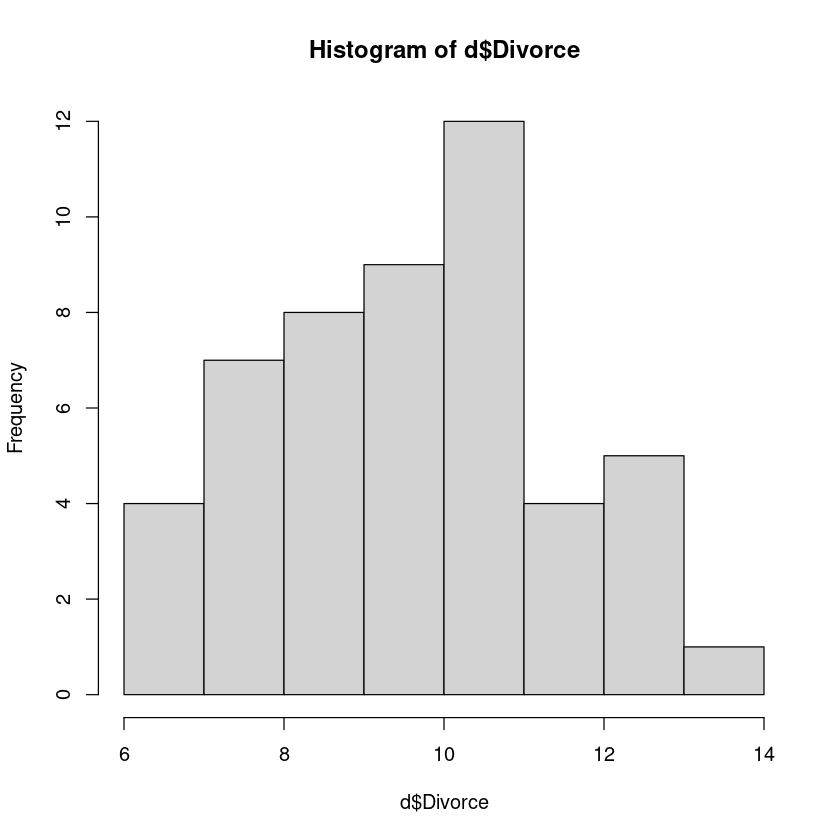

In [5]:
hist(d$Divorce)

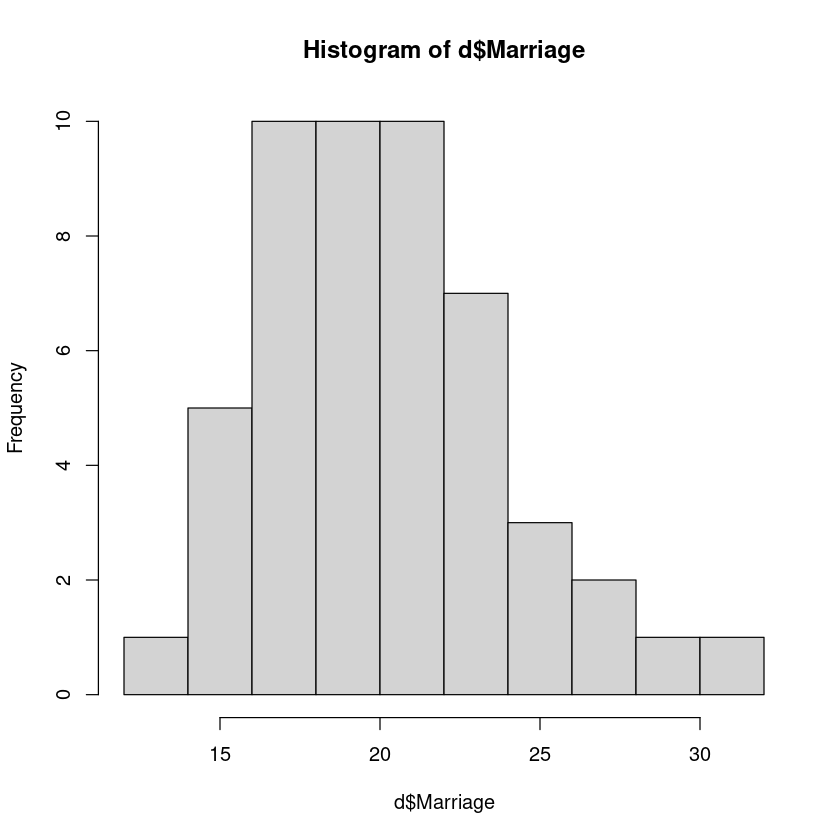

In [6]:
hist(d$Marriage)

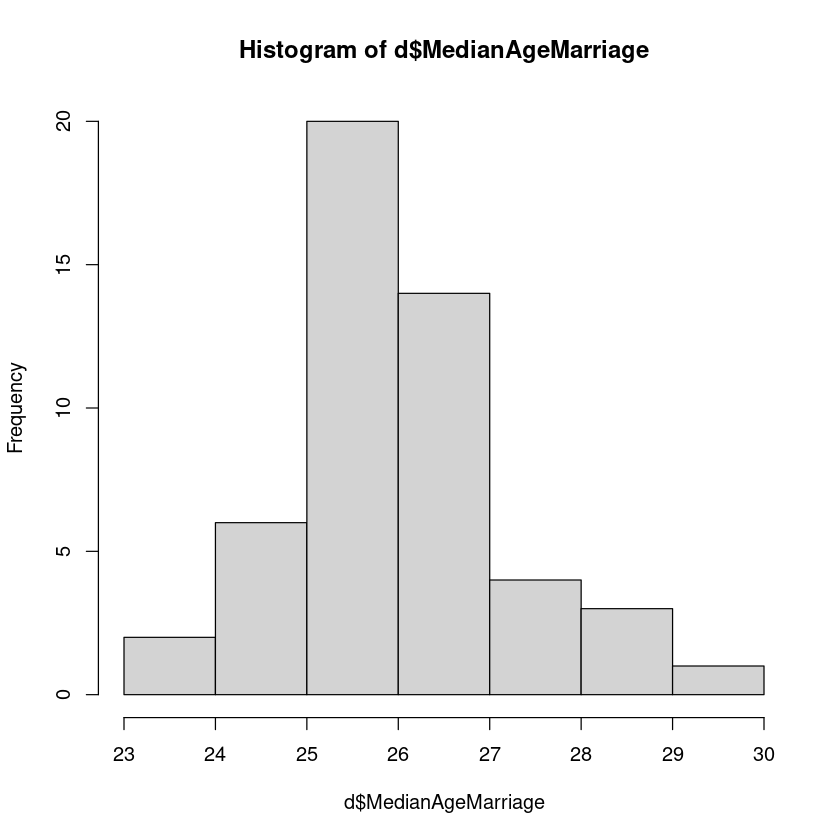

In [7]:
hist(d$MedianAgeMarriage)

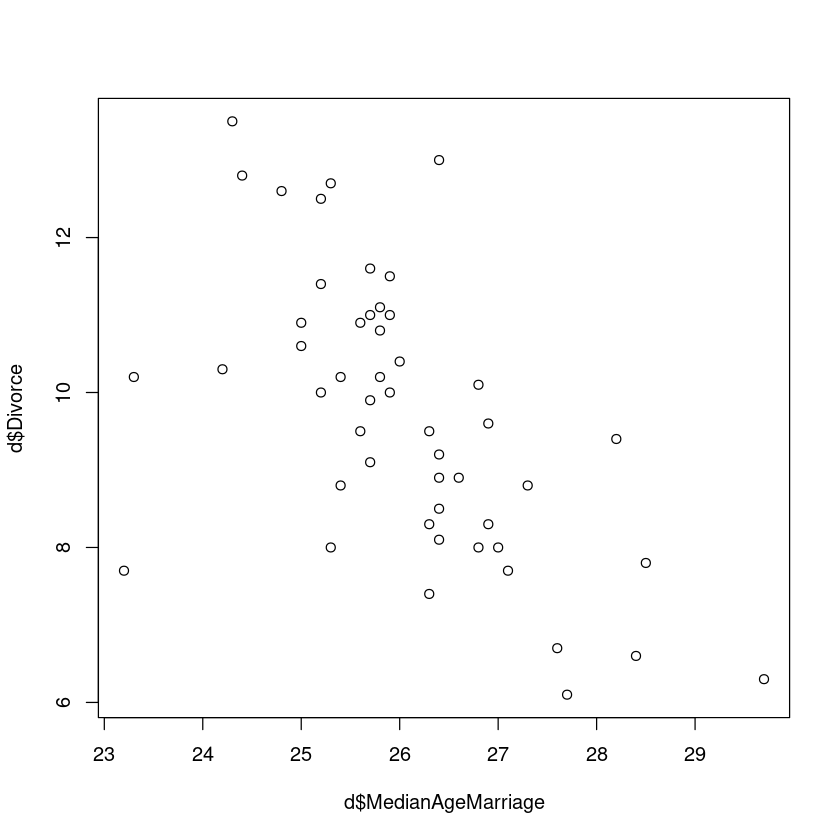

In [8]:
# Association between median marriage age and divorce
plot(d$MedianAgeMarriage, d$Divorce)

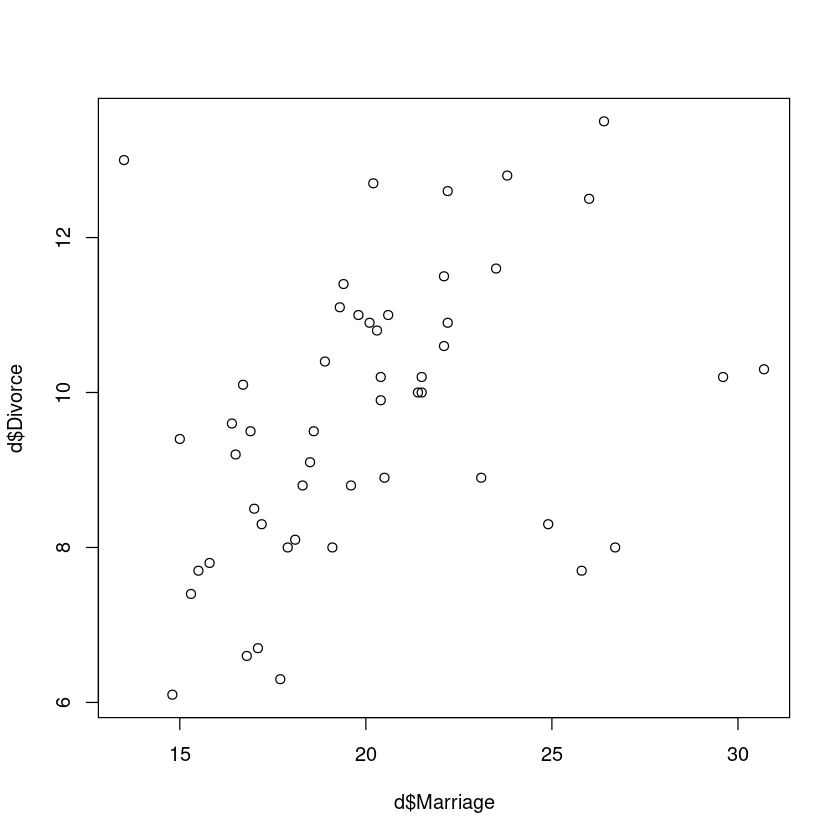

In [9]:
# Association between marriage rate and divorce rate
plot(d$Marriage, d$Divorce)

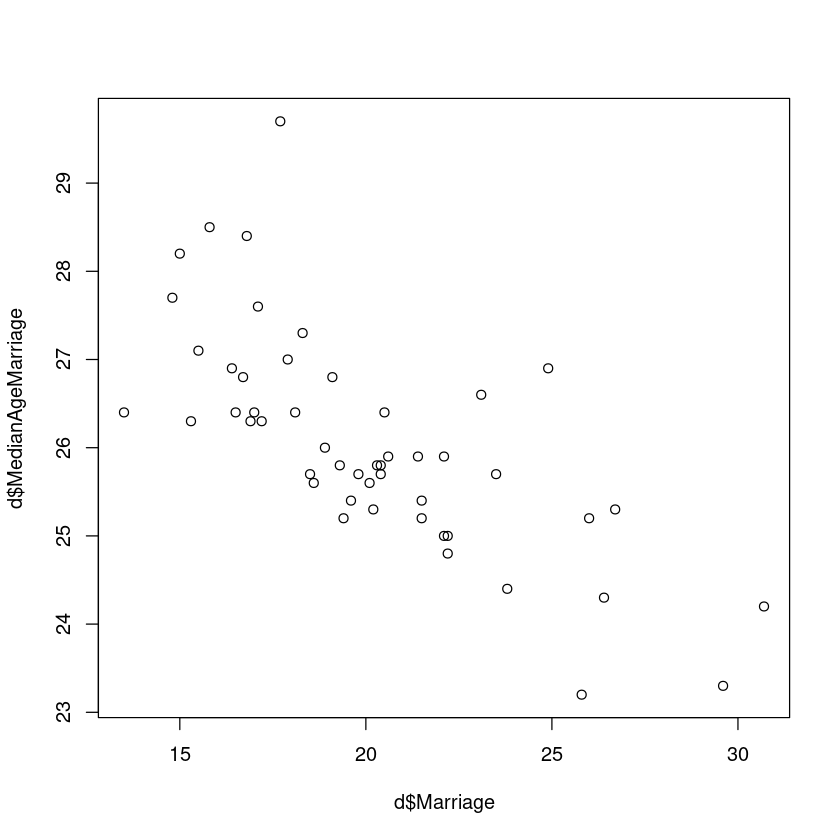

In [10]:
# association between marriage rate and median marriage age
plot(d$Marriage, d$MedianAgeMarriage)

In [11]:
# Form a dataframe and do a pairs plot ? - 
# pairs(cbind(c(d$Marriage, d$MedianAgeMarriage)))

## Scale the variables
+ Scale means subtract mean and divide by standard deviation
+ Winds up as a standardized distribution centred at 0, where + 1 means 1 standard deviation distance from 0

In [12]:
d$D <- scale(d$Divorce)
d$A <- scale(d$MedianAgeMarriage)
d$M <- scale(d$Marriage)

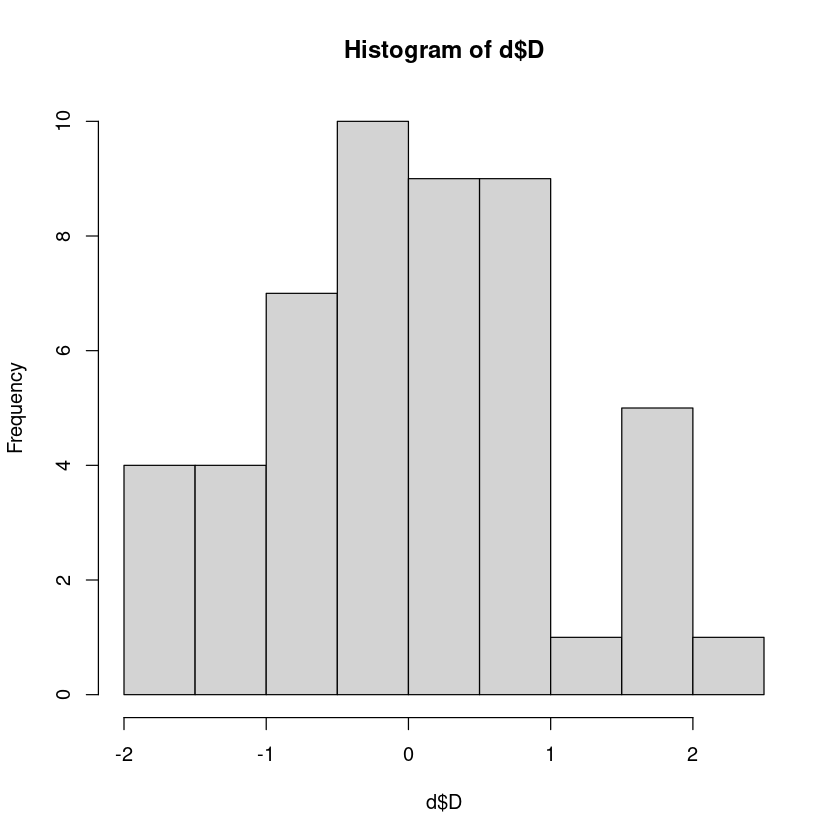

In [13]:
hist(d$D)

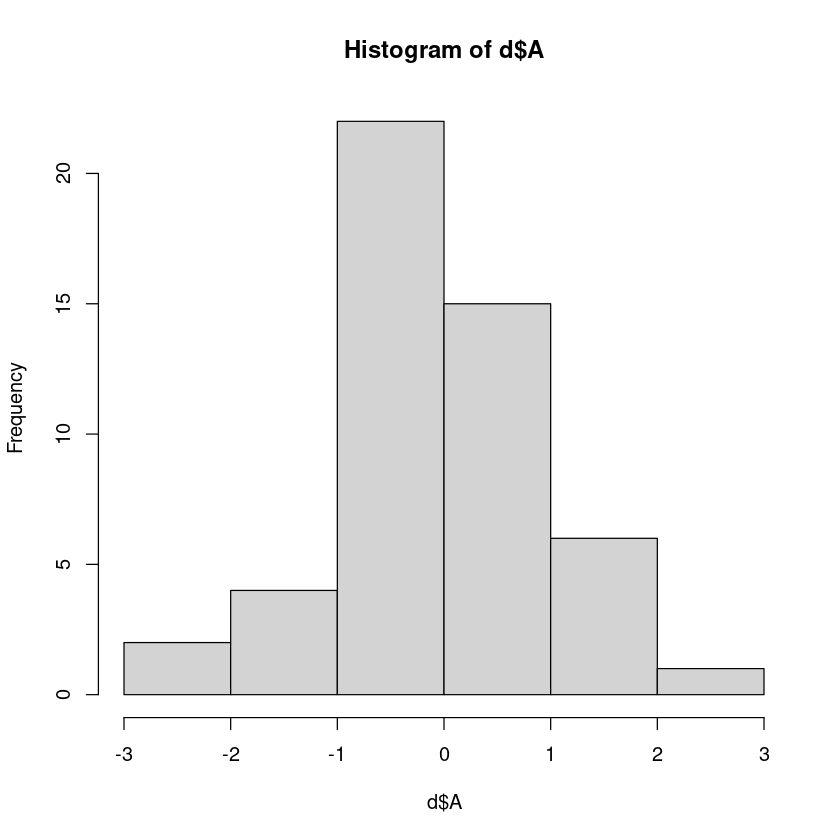

In [14]:
hist(d$A)

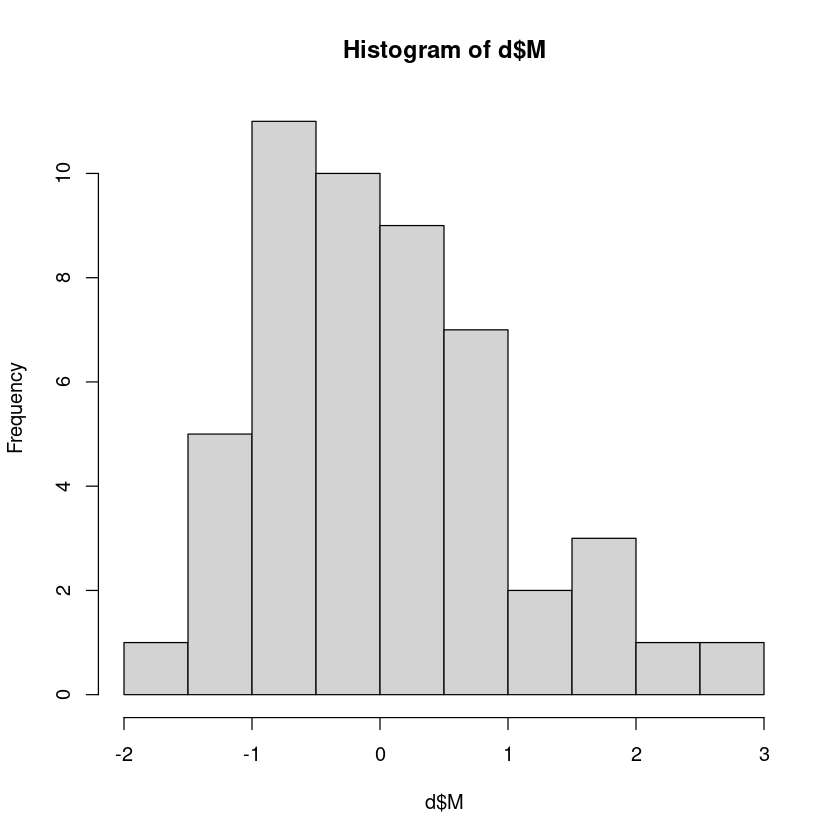

In [15]:
hist(d$M)

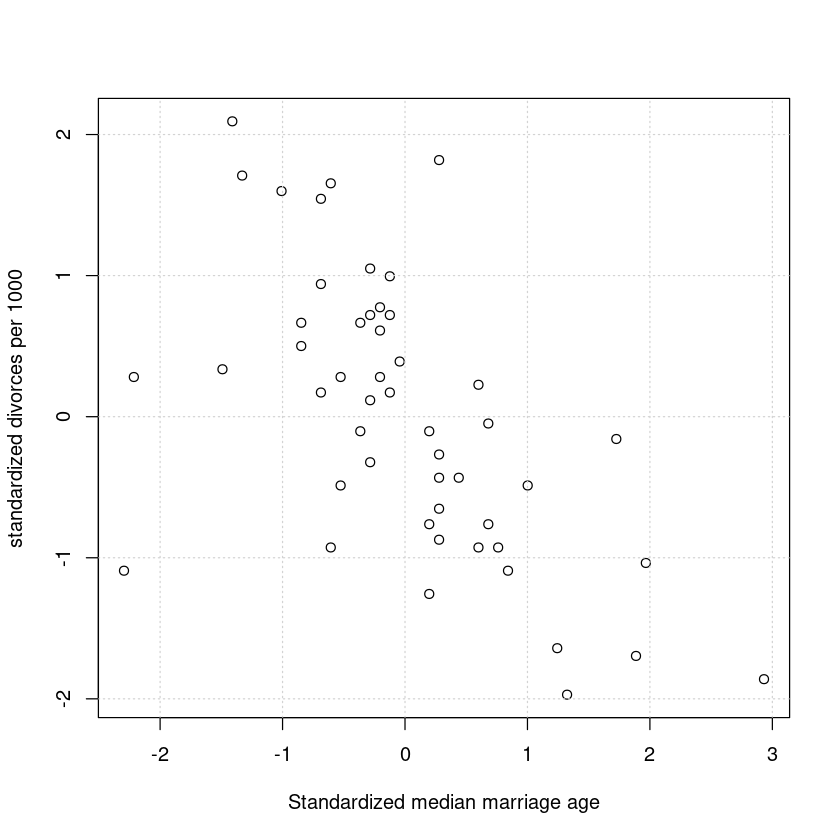

In [16]:
plot(d$A, d$D, xlab='Standardized median marriage age', ylab='standardized divorces per 1000')
grid()

## Start with Single variable Linear Regrssion

+ What is the relationship between Median marriage age and divorce rate?
+ Some data facts:
    + median marriage age
        + mean 26
        + stdev 1.2
    + divorce rate
        + mean 9.7
        + stdev 1.8
+ Our linear model will be something like:
    + Divorce rate  (for a state) ($\mu_i$) = $\alpha$ + parameter ($\beta_{A}$) x median marriage age for a state ($A_i$)
+ What are the impplications of standardizing the data on the priors?
    + y = c = mx ie the equation for a straight line
    + c is the intercept - what values is it likely to take ?
    + m is the gradient - what values is it likely to take ?

### Model

![alt text](images/5/model-1.png "Title")

+ line 1 - each state's divorce rate is normally distributed with a mean specific to the state and a common standard deviation sigma (Likelihood)

+ line 2 - the state specific mean = parameter alpha + parameter B_A x median mariage age of that state (linear model)

+ line 3 - parameter alpha is normally distributed centered at 0, with stdev = 0.2 (alpha prior)

+ line 4 - parameter beta is normally distributed centered at 0, with stdev = 0.5 (beta prior)

+ line 5 - common standard deviation sigma is exponentially distributed with param=1 (sigma prior)

### The priors - Working from bottom up

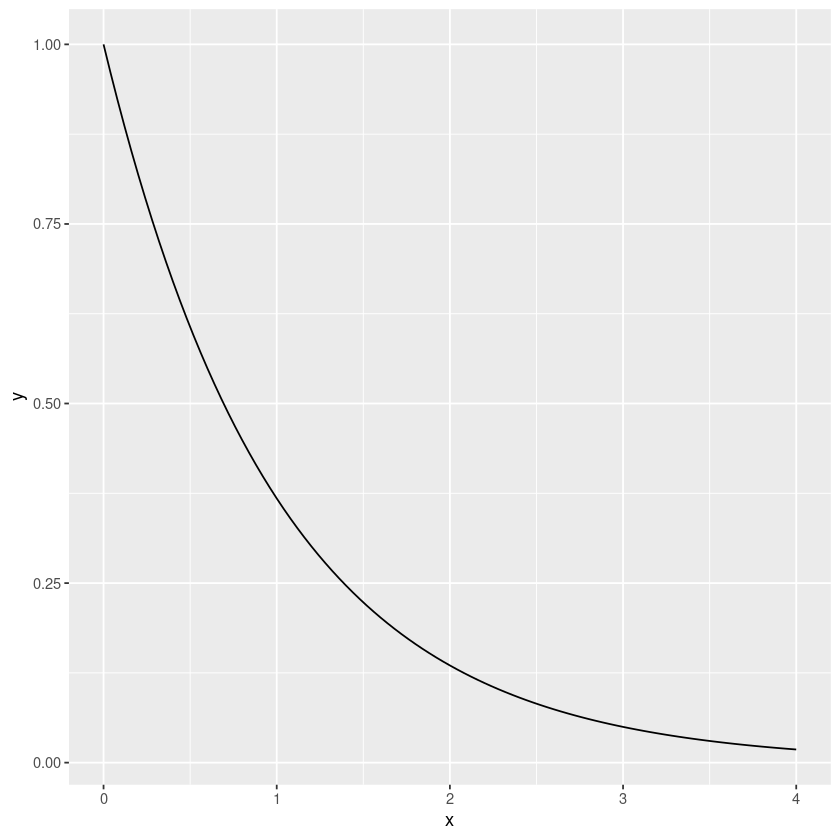

In [17]:
# sigma
ggplot(data.frame(x = c(0, 4)), aes(x = x)) +
stat_function(fun = dexp, args=c(1.0))

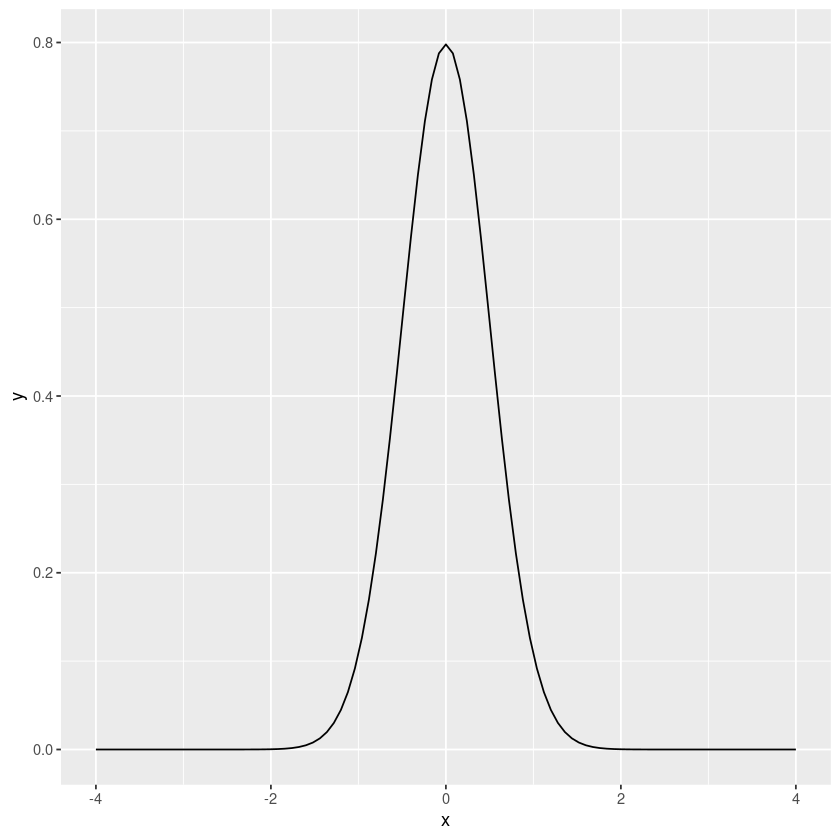

In [18]:
# beta
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
stat_function(fun = dnorm, args=c(mean=0.0, sd=0.5))

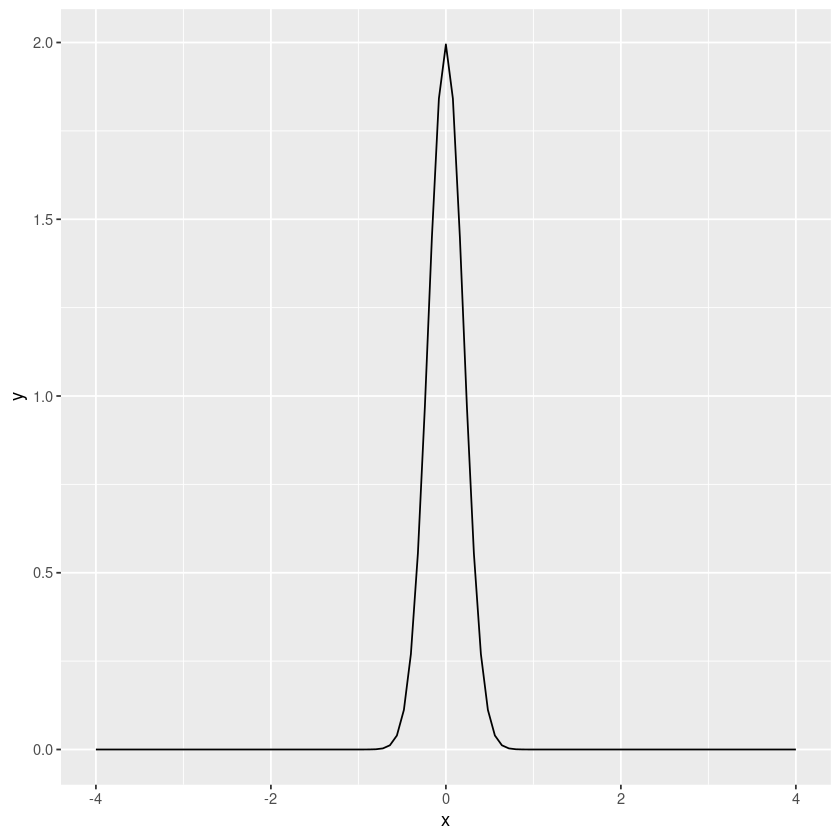

In [19]:
#alpha
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) +
stat_function(fun = dnorm, args=c(mean=0.0, sd=0.2))

![alt text](images/5/model-1.png "Title")

First - remember we are in standardized land

Why those priors?
+ alpha - the intercept - makes sense should be around 0 if plotting 2 standardized distributions against each other
+ beta - this parameter multiplies the state's median marriage age to get the state's divorce rate per 1000.
If beta = 1 then that shifts the median age by 1 standard deviation and the divorce rate by 1 standard deviation. So a change in 1.25 years would mean a change of 1.8 in divorce rate. Divorce rate is between 6 and 14 and is centered around 10.. I don't get this?

If beta = 0.5 then that shifts the state's divorce rate by 0.5 standard deviations. So a change in 0.625 years would mean a change of 0.9 in divorce rate. Why is this +/-. Surely the shape of the plot means it has to be minus?

??? This doesn't make sense we are just multiplying a standardized number to get a standardized number???

We know marriage age ranges from 23 to 30 and is centered around 26. The linear formula is beta x state's median marriage age
    + If beta = 1, then for divorce rate would shift by 1 x 1 = 1 for a state where age 1 year higher than median, would shift by (30 -26) x 1 = 
    + if beta = 2, then divorce rate would shift b

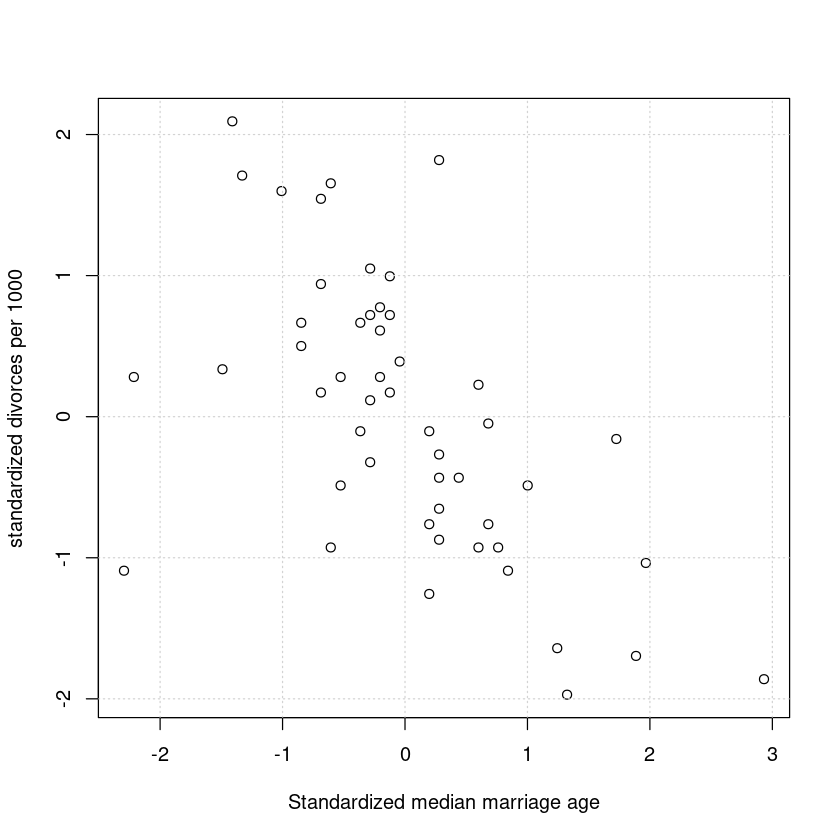

In [20]:
plot(d$A, d$D, xlab='Standardized median marriage age', ylab='standardized divorces per 1000')
# abline(lm(d$A ~ d$D))
grid()

### Model as Code

In [21]:
m5.1 <- quap(
    alist(
        D ~ dnorm(mu, sigma), # likelihood
        mu <- a + bA * A, # linear model
        a ~ dnorm( 0, 0.2), # alpha prior
        bA ~ dnorm(0, 0.5), # beta prior
        sigma ~ dexp(1) # sigma prior
    ), data=d)

+ $D_i ~ Normal(mu_i, sigma)$ - Means the (zero centered, stdev=1) Divorce rate for state i is normally distributed with paramters mu_i, sigma

+ mu <- a + bA + A - $mu_i = alpha + beta_{age}\,x \,age_i$
    + mean divorce rate in a state = base divorce rate (intercept) x factor beta x 

+ a ~ dnorm( 0, 0.2) - alpha is normally distributed centred at 0, with small standard deviation. This means - What is the divorce rate when marriage age is mean of marriage ages?
    + Why? - Because both variables are standardized meaning that the intercept should be around 0


+ bA ~ dnorm(0, 0.5) - beta is normally distributed centred at 0, with stdev=0.5
+ sigma ~ dexp(1) - sigma exponentially distributed parameter = 1

### Simulate priors

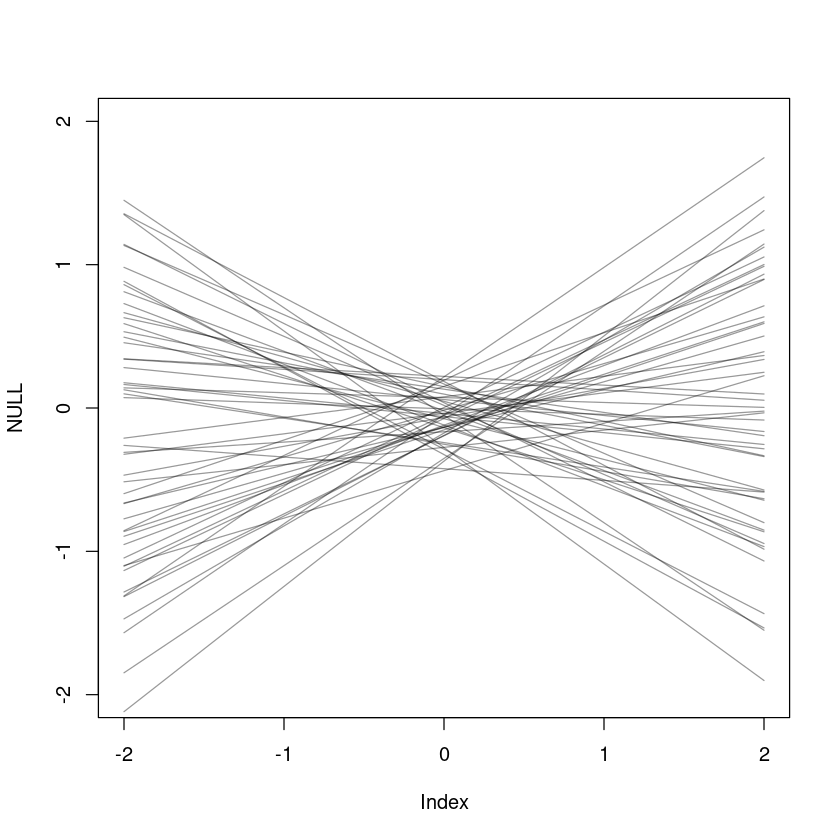

In [22]:
set.seed(10)
prior <- extract.prior(m5.1)
mu <- link(m5.1, post=prior, data=list(A=c(-2,2)))
plot(NULL, xlim=c(-2, 2), ylim=c(-2,2))
for ( i in 1:50) lines(c(-2,2), mu[i,], col=col.alpha("black", 0.4))

### My (better?) priors

In [23]:
m5.1a <- quap(
    alist(
        D ~ dnorm(mu, sigma), # likelihood
        mu <- a + bA * A, # linear model
        a ~ dnorm( 0, 0.2), # alpha prior
        bA ~ dnorm(-1.0, 0.4), # beta prior
        sigma ~ dexp(1) # sigma prior
    ), data=d)

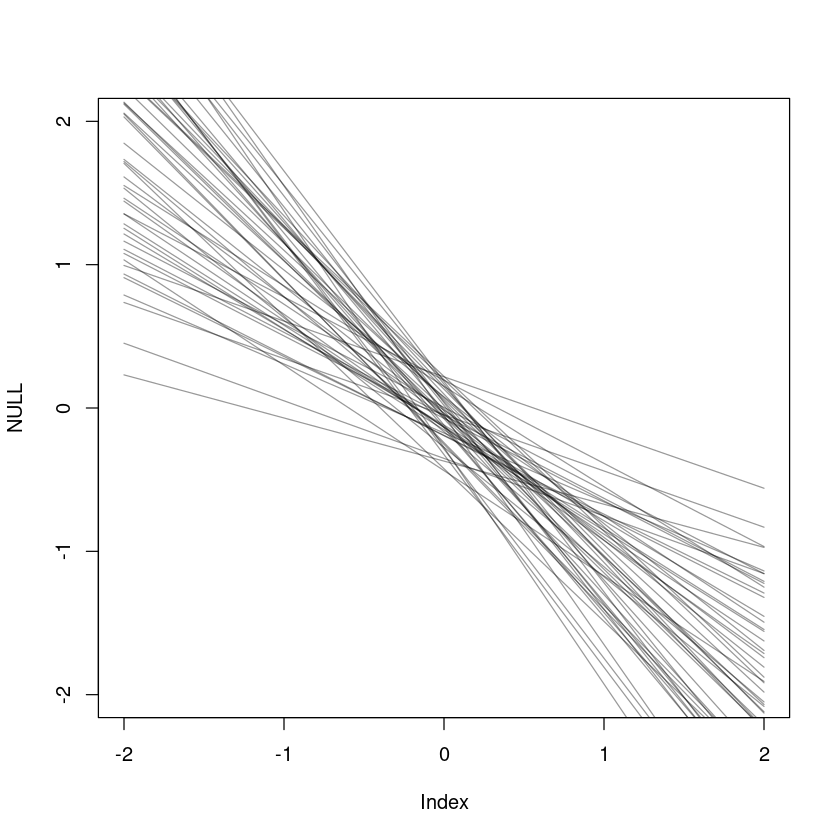

In [24]:
set.seed(10)
prior <- extract.prior(m5.1a)
mu <- link(m5.1, post=prior, data=list(A=c(-2,2)))
plot(NULL, xlim=c(-2, 2), ylim=c(-2,2))
for ( i in 1:50) lines(c(-2,2), mu[i,], col=col.alpha("black", 0.4))

# My priors
+ Are they better?
    + For this specific case - maybe
    + As general priors - No - because biased towards a negative association

### Posterior Predictions

In [25]:
# compute percentile interval of mean
A_seq <- seq(from=-3, to=3.2, length.out=30)
mu <- link(m5.1, data=list(A=A_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

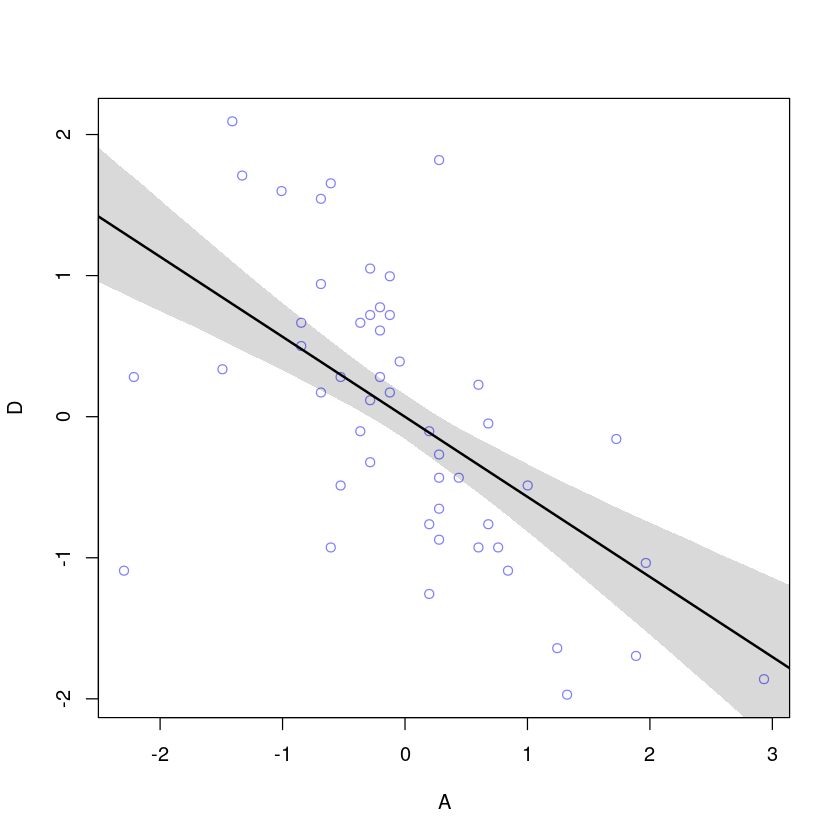

In [26]:
plot(D ~ A, data=d, col=rangi2)
lines(A_seq, mu.mean, lwd=2)
shade(mu.PI, A_seq)

In [27]:
precis(m5.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,-8.137762e-08,0.09737869,-0.1556300,0.1556299
bA,-5.684035e-01,0.10999970,-0.7442043,-0.3926028
sigma,7.883249e-01,0.07801114,0.6636480,0.9130018


#### using my better priors

In [28]:
# compute percentile interval of mean
A_seq <- seq(from=-3, to=3.2, length.out=30)
mu <- link(m5.1a, data=list(A=A_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

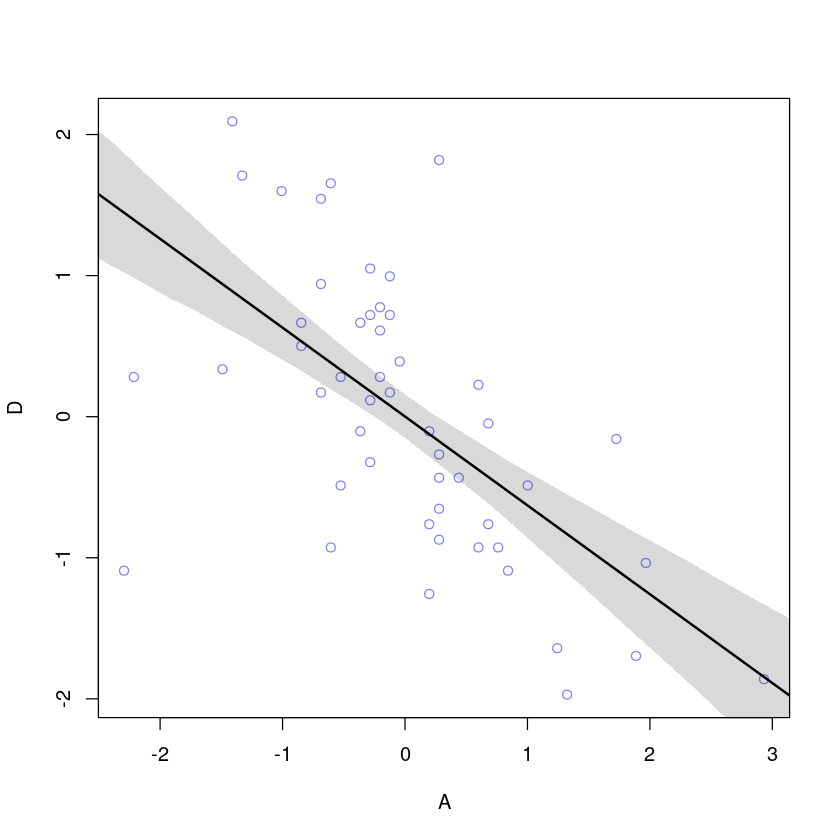

In [29]:
plot(D ~ A, data=d, col=rangi2)
lines(A_seq, mu.mean, lwd=2)
shade(mu.PI, A_seq)

In [30]:
precis(m5.1a)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,4.430189e-06,0.09738231,-0.1556313,0.1556402
bA,-6.268116e-01,0.10854380,-0.8002856,-0.4533377
sigma,7.883633e-01,0.07801900,0.6636739,0.9130527


### Relationship between marriage rate and divorce rate

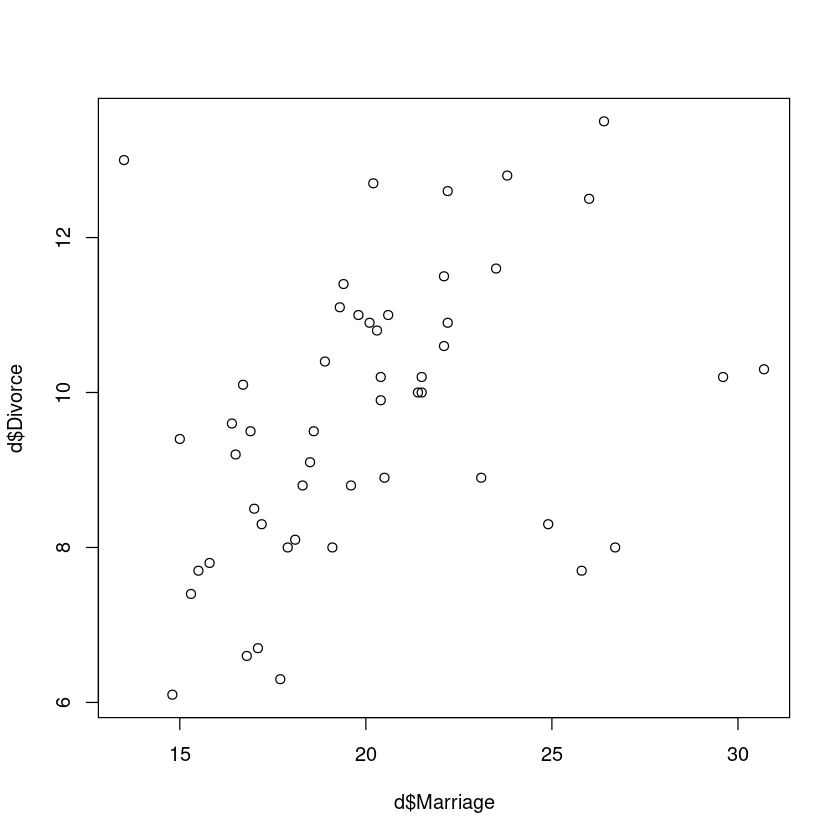

In [31]:
plot(d$Marriage, d$Divorce)

In [32]:
d$M <- scale(d$Marriage)

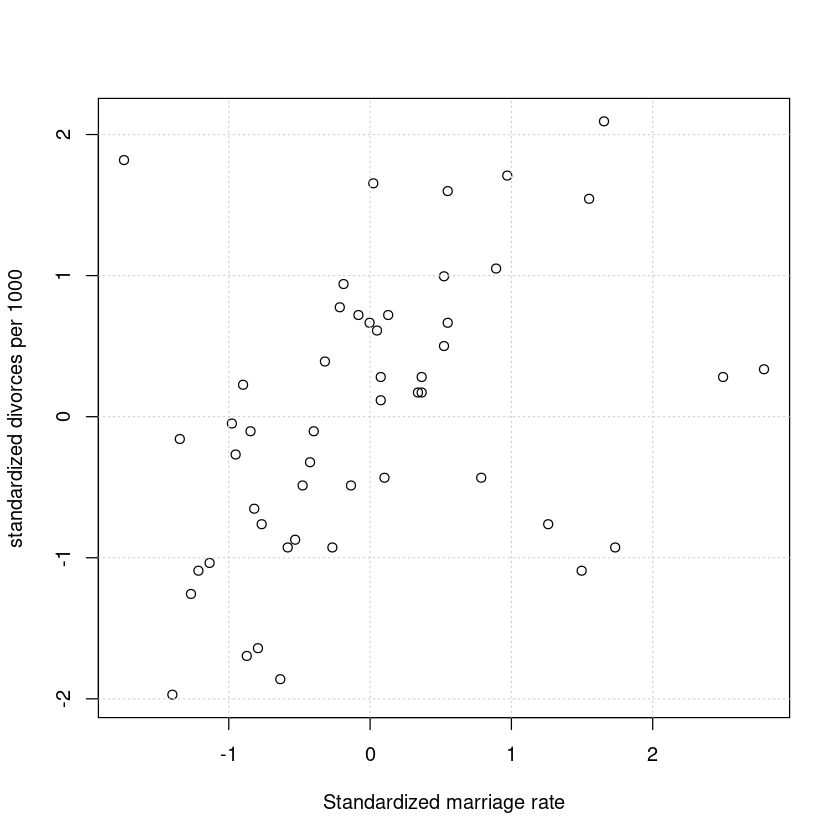

In [33]:
plot(d$M, d$D, xlab='Standardized marriage rate', ylab='standardized divorces per 1000')
# abline(lm(d$A ~ d$D))
grid()

In [34]:
# Note exactly the same priors
m5.2 <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bM * M,
        a ~ dnorm(0, 0.2),
        bM ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data=d)

In [35]:
# compute percentile interval of mean
M_seq <- seq(from=-3, to=3.2, length.out=30)
mu <- link(m5.2, data=list(M=M_seq))
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI)

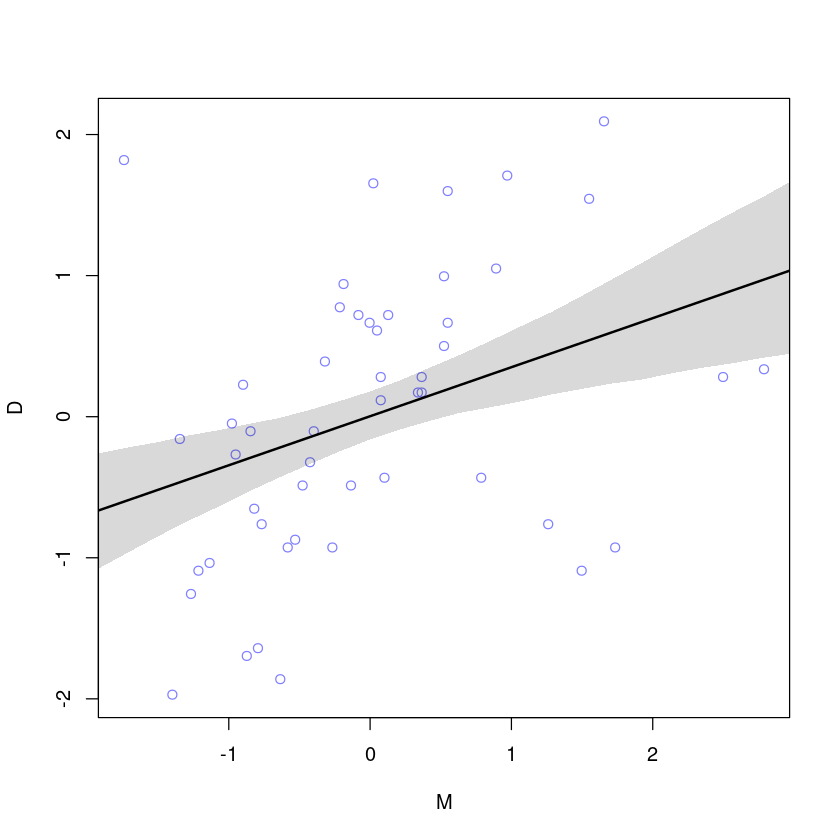

In [36]:
plot(D ~ M, data=d, col=rangi2)
lines(M_seq, mu.mean, lwd=2)
shade(mu.PI, A_seq)

In [37]:
precis(m5.2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,6.689489e-07,0.10824646,-0.1729981,0.1729994
bM,3.500544e-01,0.12592750,0.1487979,0.5513109
sigma,9.102659e-01,0.08986252,0.7666482,1.0538835


+ The relationship is not as strong between marriage rate and divorce rate - the mean of marriage_beta = 0.35
+ The relationship between marriage age and divorce rate is stronger age_beta = -0.56
+ What do we do?

### Think before you regress
+ DAG
+ Graph means points (nodes) and lines (connections)
+ Directed means connections are directional
+ Acyclic means does not flow back on itself (How can a 3 point graph flow back on itself?)

## Elemental Confounds
+ need to learn these 4, and then use them to build more complex models

![alt text](images/5/causal-alchemy.png "Title")

## Where is this causal model in the 4 models above?

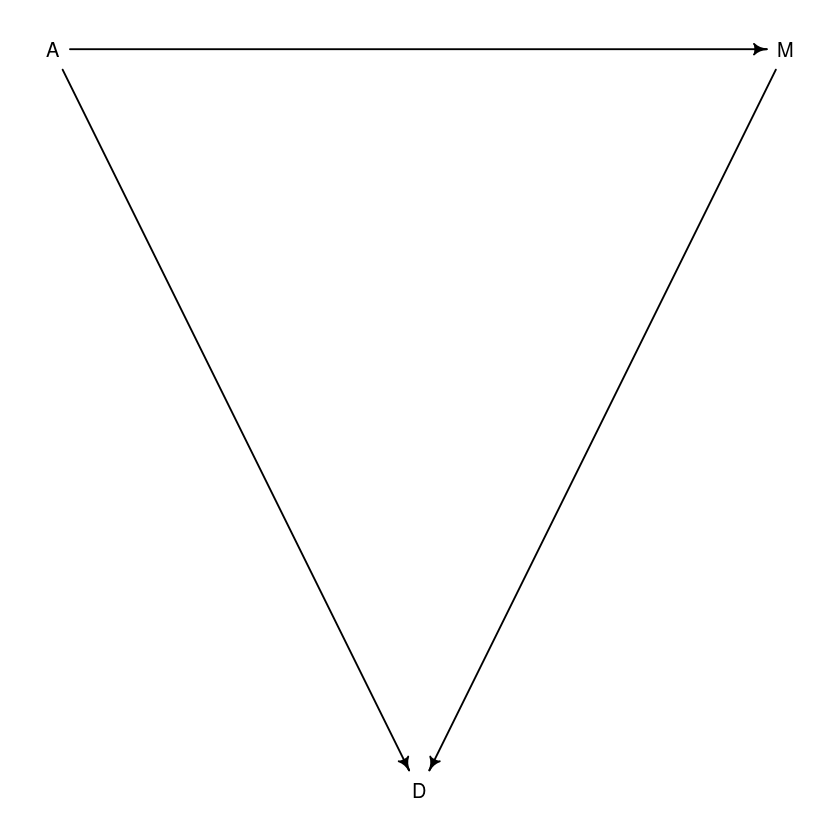

In [38]:
dag5.1 <- dagitty( "dag {
A -> D
A -> M
M -> D
}")
coordinates(dag5.1) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
drawdag( dag5.1 )

+ A directly influences D marriage age directly influences divorce rate
+ M directly influences D marriage rate directly influences divorce rate
+ A directly influences M marriage age directly influences marriage rate

+ Model 5.1 relates A to D. as marriage age goes up divorce rate tends to come down - the regression D on A -
tells us the total influence of A on D, but A goes through two paths (straight to D (A -> D) and via M (A ->M -> D))
+ It could be that A has do direct effect on D. All of it's effect could be routed thru M. This relationship is known as MEDIATION
+ Or The relationship could look like the one below

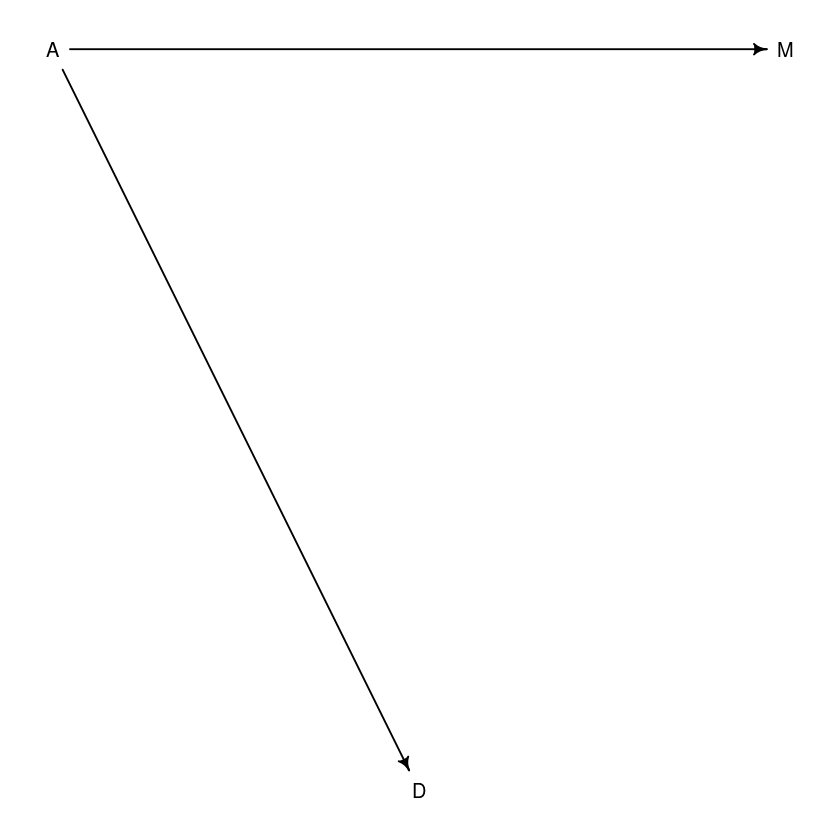

In [39]:
dag5.1 <- dagitty( "dag {
A -> D
A -> M
}")
coordinates(dag5.1) <- list( x=c(A=0,D=1,M=2) , y=c(A=0,D=1,M=0) )
drawdag( dag5.1 )

5.1.2 Testable Implications of each possible Model

For triangle model testable implications:
    + D not independent of A
    + D not independent of M
    + A not independent of M

In [40]:
print(cor(d$D, d$A))
print(cor(d$D, d$M))
print(cor(d$A, d$M))

           [,1]
[1,] -0.5972392
          [,1]
[1,] 0.3737314
          [,1]
[1,] -0.721096


"all 3 pairs are strongly associated" - Are they? What is a threshold for saying there is/is not a correlation?

In [41]:
DMA_dag1 <- dagitty('dag{ D <- A -> M -> D }')
impliedConditionalIndependencies( DMA_dag1 )
# No conditional independencies so no output to display

For 2 prong DAG
    + D not dependent of A
    + A not dpendent of M

In [42]:
DMA_dag2 <- dagitty('dag{ D <- A -> M }')
impliedConditionalIndependencies( DMA_dag2 )

D _||_ M | A

# Multiple Regression Notation
![alt text](images/5/multi-regression.png "Title")

In [43]:
m5.3 <- quap(
    alist(
        D ~ dnorm(mu, sigma),
        mu <- a + bM*M + bA*A,
        a ~ dnorm(0, 0.2),
        bM ~ dnorm(0, 0.5),
        bA ~ dnorm(0, 0.5),
        sigma ~ dexp(1)
    ), data=d)
precis(m5.3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,3.580155e-08,0.09707597,-0.1551461,0.1551462
bM,-6.538099e-02,0.15077295,-0.3063453,0.1755833
bA,-6.135129e-01,0.15098350,-0.8548136,-0.3722121
sigma,7.851174e-01,0.07784324,0.6607088,0.9095259


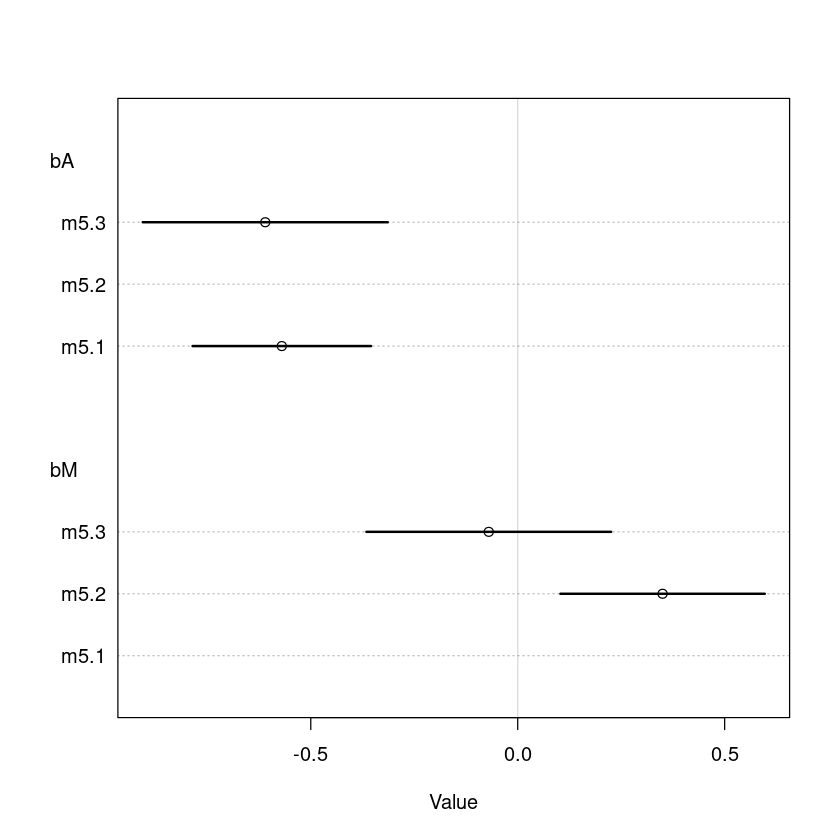

In [44]:
plot( coeftab(m5.1,m5.2,m5.3), par=c("bA","bM") )

**Conclusion**

Once we know median marriage age, there is very little predictive power in knowing the rate of marriage

The first (triangle DAG) did not say this, so it is gone

```I’ll leave it to the reader to investigate the relationship between age at marriage, A, and
marriage rate, M, to complete the picture.```

How?

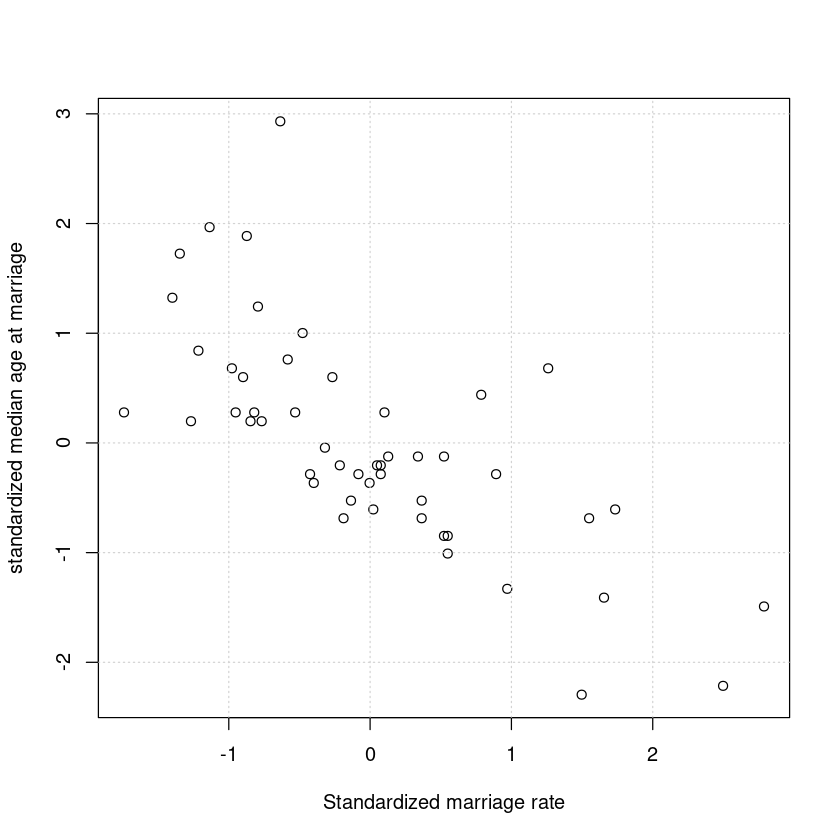

In [45]:
plot(d$M, d$A, xlab='Standardized marriage rate', ylab='standardized median age at marriage')
# abline(lm(d$A ~ d$D))
grid()

### Simulation

In [46]:
N <- 50 # number of simulated States
age <- rnorm( N )
# sim A
mar <- rnorm( N , -age ) # sim A -> M
div <- rnorm( N , age ) # sim A -> D

## 5.1.5 Plotting Multivariate Posteriors

### predictor Residual Plot

+ We have 2 predictors of divorce - age and marriage rate
+ To compute predictor residuals for either we use the other predictor to model it - so we predict age on marriage or marriage on age say with predict marriage using age
+ Then we compute the residuals where residual is predicted marriage rate - observed marriage rate (each state)
![alt text](images/residuals-plot.png "Title")

+ We see
    +  plotting the marriage rate residuals against the divorce rate - no association
    + plotting the age at marriage residuals against divorce rate we see association. This shows remaining variation among the residuals, and this variation is associated with divorce rate. Therefore, we have unexplained variation?

# posterior prediction plots
+ Check the model implied predictions against the observed data - important
    + Did the model correctly approxiamte the posterior distribution?
    + How does the model fail? - for an expect examine the cases where the model fails and work out how to improve the model.
    


In [47]:
# call link without specifying new data
# so it uses original data
# M5.3 was multi regression model
mu <- link( m5.3 )
# summarize samples across cases
mu_mean <- apply( mu , 2 , mean )
mu_PI <- apply( mu , 2 , PI )
# simulate observations
# Investigate this code - Cannot follow this
# again no new data, so uses original data
D_sim <- sim( m5.3 , n=1e4 )
D_PI <- apply( D_sim , 2 , PI )

integer(0)

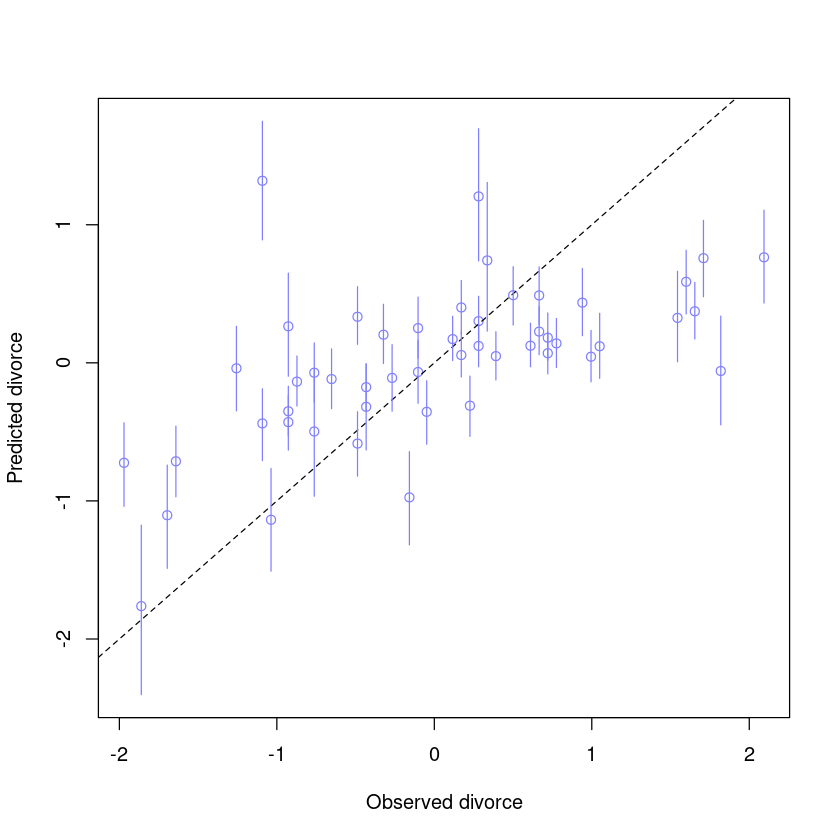

In [48]:
plot( mu_mean ~ d$D , col=rangi2 , ylim=range(mu_PI) ,
xlab="Observed divorce" , ylab="Predicted divorce" )
abline( a=0 , b=1 , lty=2 )
for ( i in 1:nrow(d) ) lines( rep(d$D[i],2) , mu_PI[,i] , col=rangi2 )
# Doesn't work
identify( x=d$D , y=mu_mean , labels=d$Loc )

+ lines are 89% compatability interval - values most compatible with the data and model.
+ Model underpredicts divorce rate for states with very high observed divorce rates
+ model overpredicts for states with very low observed divorce rates
+ Apparently this is normal and expected! - this is `regression to the mean` ???
+ Some points are very far from the 45 degree line - idaho, Utah - LDS - low divorce rates 

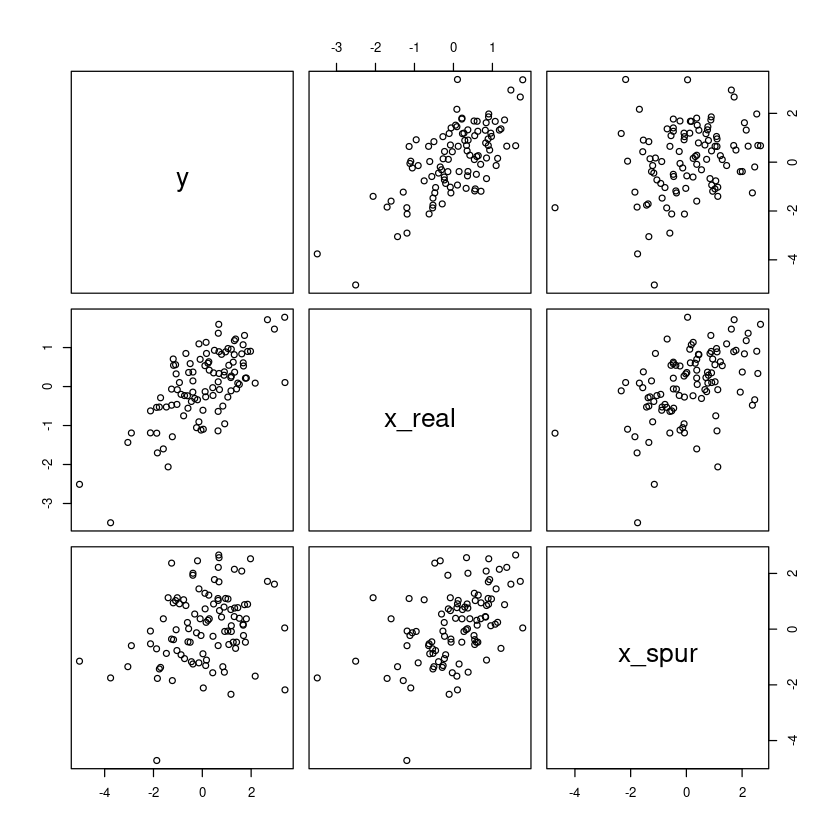

In [49]:
N <- 100
x_real <- rnorm( N )
x_spur <- rnorm( N , x_real )
y <- rnorm( N , x_real )
d <- data.frame(y,x_real,x_spur)
pairs(d)

### Counterfactual Plots - Cannot make any sense of this

In [50]:
data(WaffleDivorce)
d <- list()
d$A <- standardize( WaffleDivorce$MedianAgeMarriage )
d$D <- standardize( WaffleDivorce$Divorce )
d$M <- standardize( WaffleDivorce$Marriage )

m5.3_A <- quap(
alist(
## A -> D <- M
D ~ dnorm( mu , sigma ) ,
mu <- a + bM*M + bA*A ,
a ~ dnorm( 0 , 0.2 ) ,
bM ~ dnorm( 0 , 0.5 ) ,
bA ~ dnorm( 0 , 0.5 ) ,
sigma ~ dexp( 1 ),
## A -> M
M ~ dnorm( mu_M , sigma_M ),
mu_M <- aM + bAM*A,
aM ~ dnorm( 0 , 0.2 ),
bAM ~ dnorm( 0 , 0.5 ),
sigma_M ~ dexp( 1 )
) , data = d )

In [51]:
precis(m5.3_A)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.215791e-06,0.09707632,-0.1551455,0.1551479
bM,-6.533158e-02,0.15077405,-0.3062976,0.1756345
bA,-6.134674e-01,0.15098471,-0.8547701,-0.3721647
sigma,7.851211e-01,0.07784419,0.6607110,0.9095311
aM,2.952790e-06,0.08684807,-0.1387970,0.1388029
bAM,-6.947348e-01,0.09572726,-0.8477255,-0.5417442
sigma_M,6.817391e-01,0.06758061,0.5737323,0.7897460


In [52]:
A_seq <- seq( from=-2 , to=2 , length.out=30 )

In [53]:
# prep data
sim_dat <- data.frame( A=A_seq )

In [54]:
# simulate M and then D, using A_seq
s <- sim( m5.3_A , data=sim_dat , vars=c("M","D") )

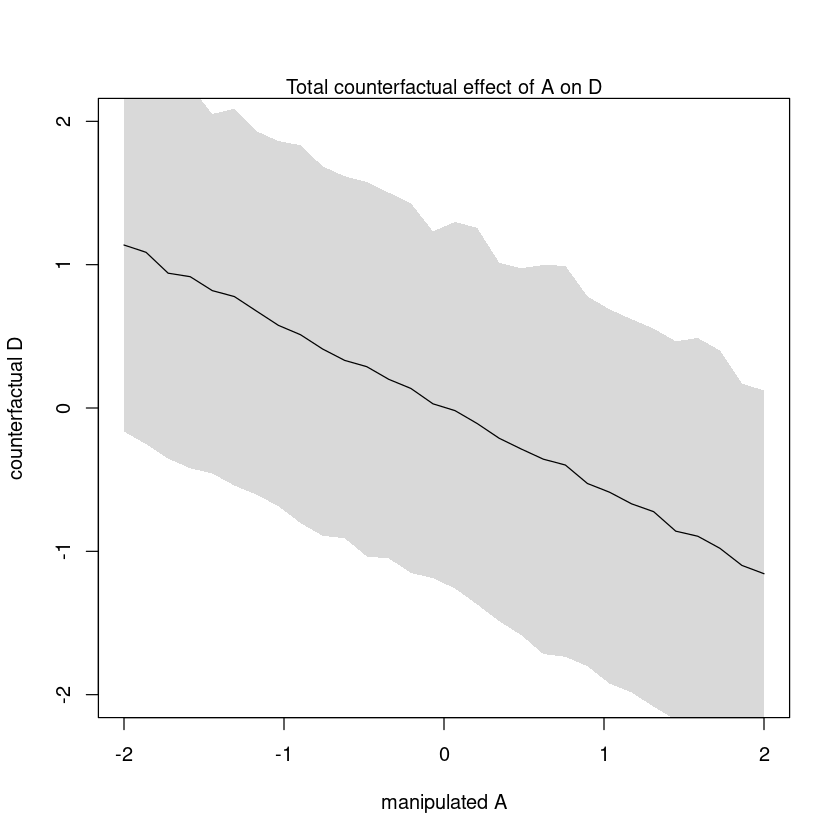

In [55]:
# Book has error dat should be sim_dat
# display counterfactual predictions
plot( sim_dat$A , colMeans(s$D) , ylim=c(-2,2) , type="l" , xlab="manipulated A" , ylab="counterfactual D" )
shade( apply(s$D,2,PI) , sim_dat$A )
mtext( "Total counterfactual effect of A on D" )

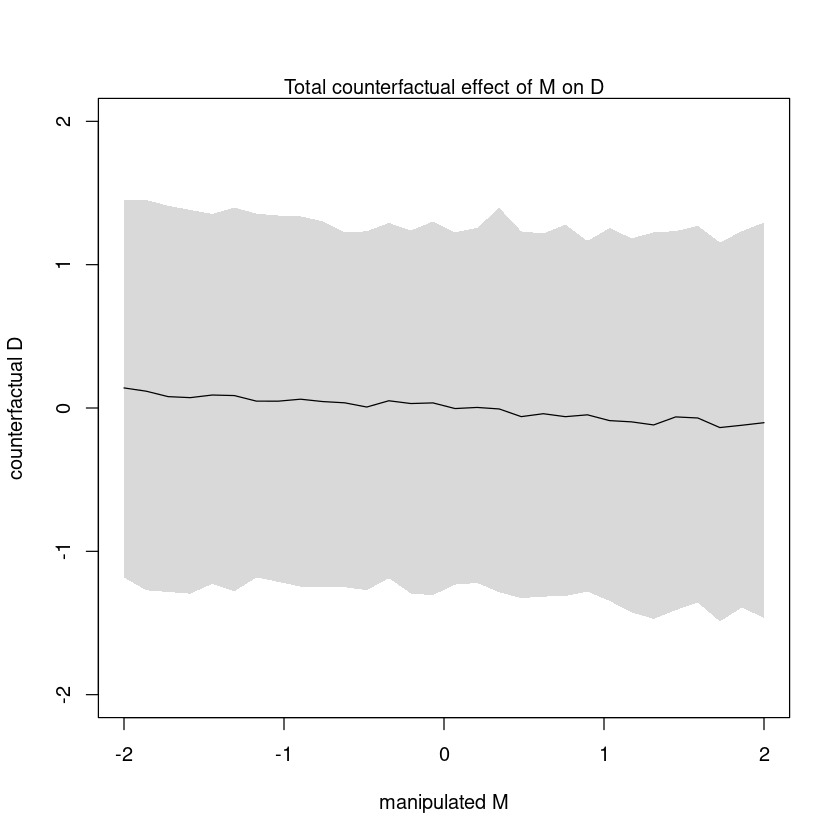

In [56]:
sim_dat <- data.frame( M=seq(from=-2,to=2,length.out=30) , A=0 )
s <- sim( m5.3_A , data=sim_dat , vars="D" )
plot( sim_dat$M , colMeans(s) , ylim=c(-2,2) , type="l" ,
xlab="manipulated M" , ylab="counterfactual D" )
shade( apply(s,2,PI) , sim_dat$M )
mtext( "Total counterfactual effect of M on D" )